<img src="https://upload.wikimedia.org/wikipedia/commons/a/a5/Logo_hotmart.png" alt="logo" width="200" height="70">

Cecília Souza - Data Analyst - February 2024

# **Business Case Hotmart**

## **Business context and problem definition**

Hotmart is a global company that has conquered a wide market of info products, registering significant growth in its business and in the economy. The platform has established an extensive network of content producers who trust it to intermediate the sales of their products, providing customers with the best possible experience.

Info products are highly scalable and accessible items, easily accessible on various devices, anytime and anywhere. With these characteristics, info products have become a crucial source of income for many content producers. The success of these products has encouraged producers to expand their creations, aiming to build successful digital businesses.

Many producers choose to involve co-producers to enhance the development of their products, resulting in mutual benefits from sales. Additionally, there are affiliates who promote producers' products in exchange for a commission on sales.

However, managing these products can be a challenge for content producers due to the large number of sales, products, and affiliates, making it difficult to analyze them individually. In this scenario, it is crucial to conduct an analysis of the portfolios of products from content producers and consider the possibility of creating a sales and billing management tool. This tool would allow producers to view a summary of their performance and better manage their portfolios of products and partners.

**Objective:**

- To understand the portfolio of producers and the diversity of products, niches, and dynamics of affiliates.


**Questions to investigate**
1. How many sales were made over the months?
2. How many creators sell at Hotmart monthly?
3. How are sales distributed between different market niches?
4. How are sales by product format?
5. How is the revenue generated on the platform?
6. What is the creators’ revenue?
7. What is the distribution of sales by creators?

**Success Criteria:**

- Identification of opportunities to improve user experience and increase sales.


## Environment preparation

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [ ]:
# Environment Setting
df = pd.read_csv('/content/drive/MyDrive/Data/Purchases.csv')
df.head(3)

,product_format,purchase_commission_affiliate,purchase_commission_cocreator,purchase_has_coupon,purchase_gmv,product_id,product_niche,purchase_id,purchase_installment_number,purchase_parent_id,purchase_payment_method,purchase_release_datetime,purchase_recurrency_number,purchase_recurrency_type,user_buyer_country,buyer_id,user_creator_country,creator_id
0,Podcast,NaN,NaN,False,-0.160070,98-121-24-126-123-123-118,Music,97-125-24-117-120-124-115-21-115,1,NaN,QuickSettle,2023-07-15 04:38:38.000,2.0,Recurring,Solaris,101-118-29-126-120-124-116-21,Lunaria,103-124-25-125-119-126-118-24
1,Podcast,NaN,NaN,False,1.062798,97-125-21-123-127-118-127,History,98-118-29-120-127-122-126-24-117,1,NaN,EcoWallet,2023-01-19 08:04:01.000,2.0,Recurring,Solaris,101-126-29-117-126-121-117-21,Lunaria,102-121-25-127-119-119-114-21
2,Podcast,NaN,NaN,False,2.476160,98-118-31-120-127-127-115,Technology,98-118-30-126-118-119-116-20-121,1,NaN,QuickSettle,2023-02-01 08:24:28.000,1.0,NaN,Neptunia,101-124-28-116-120-122-113-27,Auroria,103-118-30-122-126-121-113-31


## Data exploration


**Shows the number of rows and columns in the dataset**

In [ ]:
df.shape

(1731344, 18)

We have a total of 1.731.344 rows and 18 columns.

**Observing the data types**

In [ ]:
# Show data types
df.dtypes

product_format                    object
purchase_commission_affiliate    float64
purchase_commission_cocreator    float64
purchase_has_coupon                 bool
purchase_gmv                     float64
product_id                        object
product_niche                     object
purchase_id                       object
purchase_installment_number        int64
purchase_parent_id                object
purchase_payment_method           object
purchase_release_datetime         object
purchase_recurrency_number       float64
purchase_recurrency_type          object
user_buyer_country                object
buyer_id                          object
user_creator_country              object
creator_id                        object
dtype: object

Most of the columns are in the correct format, it is only necessary to change the type of the purchase_release_datetime column to datetime.

In [ ]:
# Changing data type to datetime
df['purchase_release_datetime'] = pd.to_datetime(df['purchase_release_datetime'])

**Checking for duplicate data**

In [ ]:
# Show duplicates
df.duplicated().sum()

0

There are no duplicate data in the dataset.

**Checking if there is null data**

In [ ]:
# Shows columns with null data
df.isnull().sum()

product_format                         0
purchase_commission_affiliate    1540136
purchase_commission_cocreator    1253172
purchase_has_coupon                    0
purchase_gmv                           0
product_id                             0
product_niche                          0
purchase_id                            0
purchase_installment_number            0
purchase_parent_id               1619260
purchase_payment_method                0
purchase_release_datetime              0
purchase_recurrency_number       1195506
purchase_recurrency_type          203948
user_buyer_country                     0
buyer_id                               0
user_creator_country                   0
creator_id                             0
dtype: int64

It does not seem necessary to treat null data, as the columns that have this type of data may be products for which affiliate, co-creator and recurring sales rules do not apply.

## Exploratory Data Analysis

**Observing the basic description of the numeric data columns**

In [ ]:
df.describe()

,purchase_commission_affiliate,purchase_commission_cocreator,purchase_gmv,purchase_installment_number,purchase_recurrency_number
count,1.912080e+05,4.781720e+05,1.731344e+06,1.731344e+06,535838.000000
mean,3.251563e-15,1.308700e-14,-1.326007e-14,2.203805e+00,5.697666
std,1.000000e+00,1.000000e+00,1.000000e+00,3.109230e+00,8.523935
min,-4.940203e-01,-3.671539e-01,-3.349761e-01,1.000000e+00,1.000000
25%,-3.837708e-01,-3.346808e-01,-2.884425e-01,1.000000e+00,1.000000
50%,-2.495140e-01,-2.544673e-01,-2.195856e-01,1.000000e+00,2.000000
75%,1.013261e-01,2.542341e-03,-6.951845e-02,1.000000e+00,6.000000
max,5.804361e+01,1.225564e+02,3.008698e+02,1.200000e+01,212.000000


The **purchase_commission_affiliate**, **purchase_commission_cocreator** and **purchase_gmv** columns have a mean very close to 0 and a standard deviation equal to 1, which can be expected for data that is standardized.

**purchase_commission_affiliate:** Most affiliate commissions are within a reasonable range given that the maximum value is 58.04 and the minimum is -0.494.

**purchase_commission_cocreator:** The maximum value is 122.56, indicating that there are cases of relatively high co-creator commissions.

**purchase_gmv (Gross Merchandise Volume):** GMV has a relatively high standard deviation, indicating a large dispersion in values.

**purchase_installment_number:** Most transactions have 1 or 2 installments, as indicated by percentiles and median.
The maximum number of installments is 12, which is a common standard in many payment systems.

**purchase_recurrency_number:** The median is 2, indicating that half of the transactions have a recurrence of 2 or less.
The maximum recurrence value is 212, which may indicate frequent recurring transactions for some customers.

Analyzing unique product shape values

In [ ]:
df.product_format.unique()

array(['Podcast', 'Ebook', 'Software', 'Video', 'Livestream', 'Webinar'],
      dtype=object)

Analyzing the unique values of niches

In [ ]:
df.product_niche.unique()

array(['Music', 'History', 'Technology', 'Entertainment', 'Fashion',
       'Parenting', 'Sports', 'Beauty & Wellness', 'Environment',
       'Food & Beverage', 'Gaming', 'Health', 'Travel', 'Automotive',
       'Self-Help', 'Education', 'Lifestyle', 'News & Politics',
       'Social Media', 'Photography', 'E-commerce', 'Virtual Events',
       'Art & Design', 'Real Estate', 'Finance', 'Literature',
       'DIY & Crafts', 'Science', 'Personal Finance',
       'Professional Development'], dtype=object)

Observing the unique values of payment methods

In [ ]:
df.purchase_payment_method.unique()

array(['QuickSettle', 'EcoWallet', 'FlexiPay', 'CyberTransfer',
       'SwiftCash', 'NovaPay', 'PaySphere', 'MoneyWave',
       'UltraTransaction', 'FlashFinance'], dtype=object)

Observing unique purchase recurrency type values

In [ ]:
df.purchase_recurrency_type.unique()

array(['Recurring', nan, 'Single'], dtype=object)

Observing the unique values of the creators’ country

In [ ]:
df.user_creator_country.unique()

array(['Lunaria', 'Auroria', 'Terranova', 'Etheria', 'Celestia',
       'Atlantica', 'Mystica', 'Zephyria', 'Neptunia', 'Solaris'],
      dtype=object)

Observing buyers' unique country values

In [ ]:
df.user_buyer_country.unique()

array(['Solaris', 'Neptunia', 'Zephyria', 'Celestia', 'Auroria',
       'Lunaria', 'Etheria', 'Terranova', 'Mystica', 'Atlantica'],
      dtype=object)

### **Number of Total Sales:**

1. How many sales were made over the months?
2. How are sales distributed between different market niches?
3. How are sales by product format?

How many sales were made over the months?

In [ ]:
# Creating year and year-month auxiliary columns
df['year'] = df['purchase_release_datetime'].dt.year
df['year-month'] = df['purchase_release_datetime'].dt.to_period('M')

In [ ]:
sales_per_year = df.groupby('year')['purchase_id'].nunique()
print(sales_per_year)

year
2018          1
2021          4
2022     156249
2023    1572246
Name: purchase_id, dtype: int64


In [ ]:
sales_per_month = df.groupby('year-month')['purchase_id'].nunique()
print(sales_per_month)

year-month
2018-09         1
2021-06         1
2021-09         1
2021-11         1
2021-12         1
2022-01         1
2022-03         4
2022-04         2
2022-05         4
2022-06         2
2022-07        11
2022-08        26
2022-09        74
2022-10       249
2022-11     26727
2022-12    129149
2023-01    153192
2023-02    136233
2023-03    152234
2023-04    137490
2023-05    134213
2023-06    132232
2023-07    141481
2023-08    150257
2023-09    142042
2023-10    149817
2023-11    143068
Freq: M, Name: purchase_id, dtype: int64


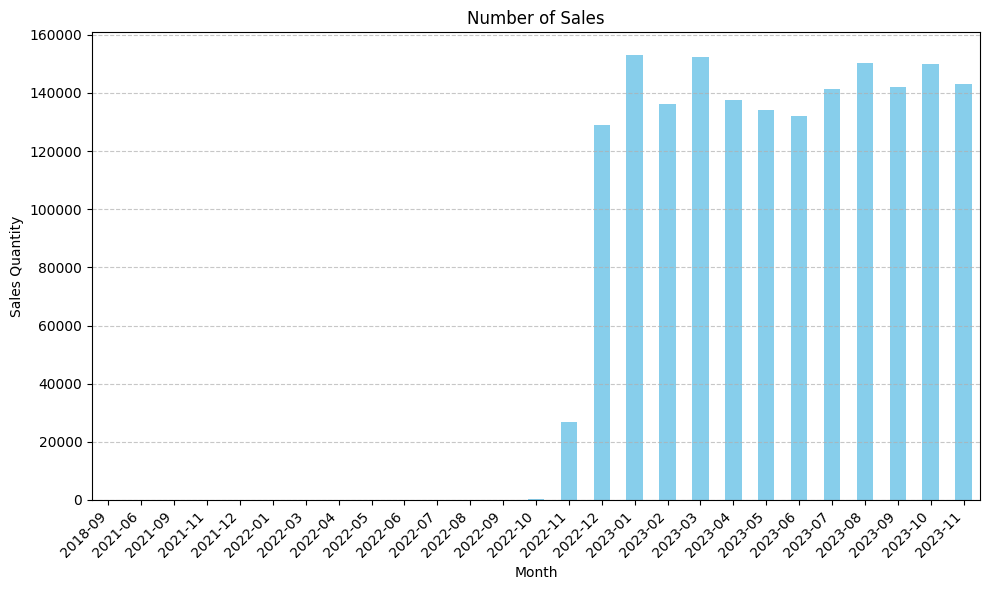

In [ ]:
plt.figure(figsize=(10, 6))
sales_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Sales')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Hotmart has a high volume of sales per month and has been keeping these numbers stable, which may indicate good consolidation in the market.

In [ ]:
crator_per_month = df.groupby('year-month')['creator_id'].nunique()
print(crator_per_month)

year-month
2018-09        1
2021-06        1
2021-09        1
2021-11        1
2021-12        1
2022-01        1
2022-03        4
2022-04        2
2022-05        4
2022-06        2
2022-07       11
2022-08       26
2022-09       61
2022-10      169
2022-11     7083
2022-12    15391
2023-01    16737
2023-02    16649
2023-03    17811
2023-04    17110
2023-05    17493
2023-06    17481
2023-07    17813
2023-08    18559
2023-09    18010
2023-10    18034
2023-11    18117
Freq: M, Name: creator_id, dtype: int64


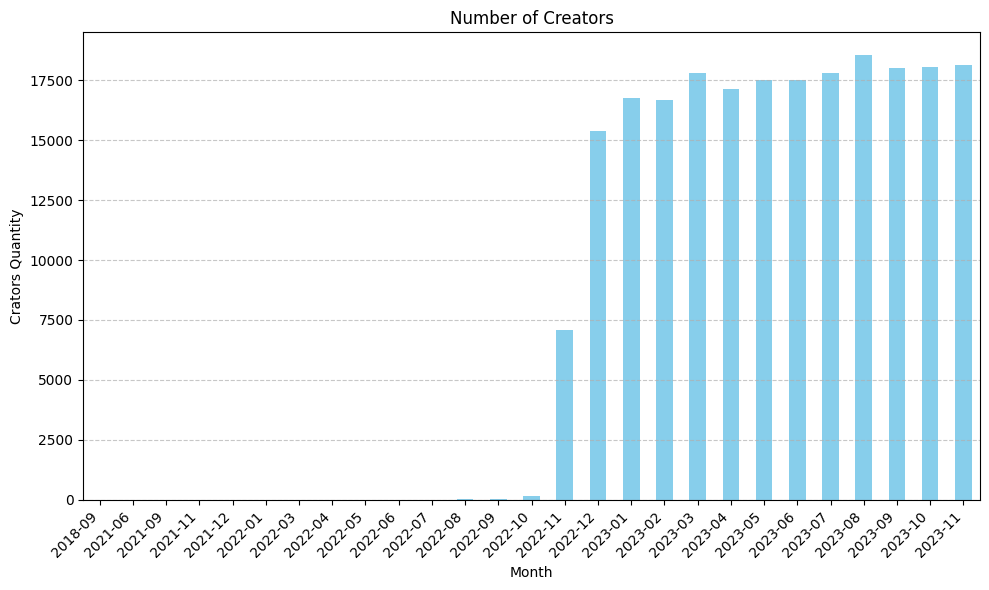

In [ ]:
plt.figure(figsize=(10, 6))
crator_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Creators')
plt.xlabel('Month')
plt.ylabel('Crators Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The number of creators selling on Hotmart appears to have experienced gradual growth over the months, especially from 2022 to 2023. This suggests a growing adoption of new creators on the platform over time.

**How are sales distributed between different market niches?**

In [ ]:
sales_by_niche = df.groupby('product_niche')['purchase_id'].nunique().sort_values(ascending=False)
print(sales_by_niche)

product_niche
Food & Beverage             116950
Fashion                     105665
News & Politics             102582
Lifestyle                    96524
Gaming                       92696
Travel                       92341
Art & Design                 88887
Self-Help                    78776
Science                      76466
Technology                   73143
Music                        71746
Education                    69059
Environment                  66243
Entertainment                64885
Parenting                    60430
Photography                  59297
Sports                       58858
Automotive                   55744
Health                       48881
Beauty & Wellness            47970
Real Estate                  42782
History                      37275
Literature                   27843
Finance                      26919
Social Media                 21042
E-commerce                   15960
Personal Finance             11789
DIY & Crafts                  8215
Virtua

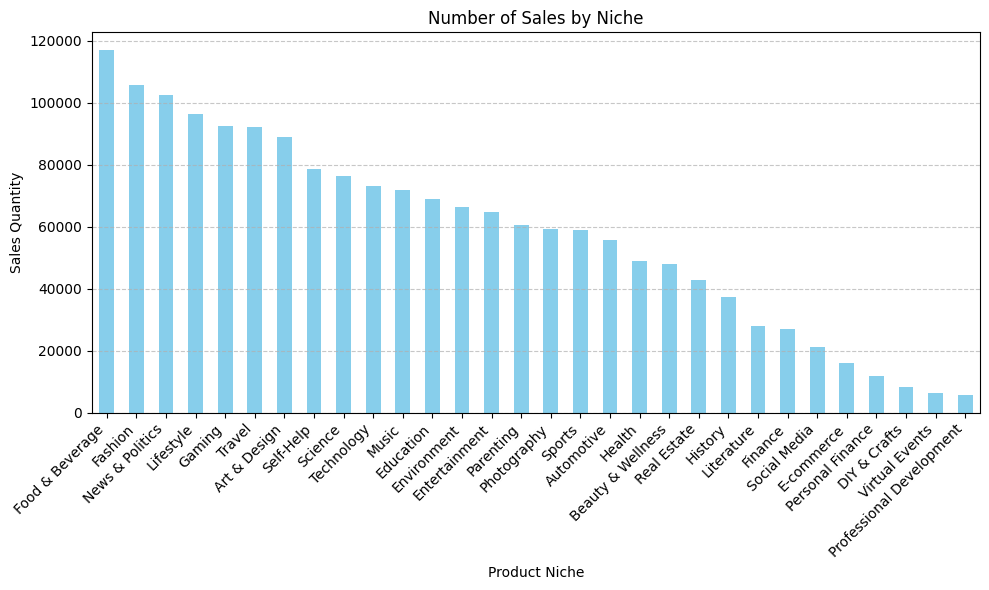

In [ ]:
plt.figure(figsize=(10, 6))
sales_by_niche.plot(kind='bar', color='skyblue')
plt.title('Number of Sales by Niche')
plt.xlabel('Product Niche')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Diversity of Niches:**
The result shows a wide diversity of niches, from food and fashion to news, technology and education. This suggests that the platform caters to a variety of customer interests and needs.

**Popular Niche:**
The Food & Beverage niche leads in number of sales, which may indicate that products related to cooking and food are highly sought after by platform users.

**Interest in Lifestyles and Entertainment:**
Niches such as Lifestyle, Gaming, Travel, Art & Design, Entertainment and Sports also have a significant number of sales. This suggests considerable user interest in products related to lifestyle, entertainment and hobbies.

**How are sales by product format?**

In [ ]:
sales_by_format = df.groupby('product_format')['purchase_id'].nunique().sort_values(ascending=False)
print(sales_by_format)

product_format
Ebook         863635
Podcast       543003
Video         184576
Livestream    100987
Software       22398
Webinar        15471
Name: purchase_id, dtype: int64


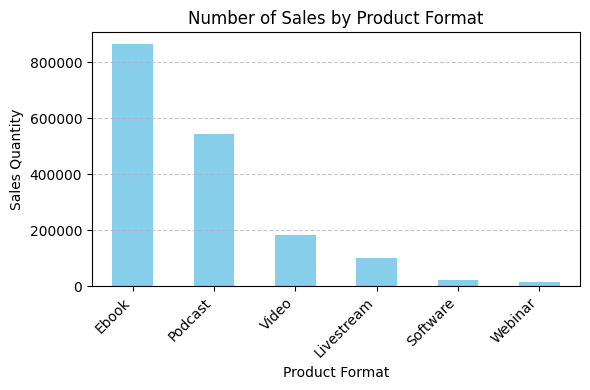

In [ ]:
plt.figure(figsize=(6, 4))
sales_by_format.plot(kind='bar', color='skyblue')
plt.title('Number of Sales by Product Format')
plt.xlabel('Product Format')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- The Ebook format leads in number of sales, with 863,635 units sold. This suggests that consumers have a significant preference for digital content in the form of e-books.

- The Software and Webinar formats have the lowest number of sales, with 22,398 and 15,471 units sold, respectively. This may indicate a more limited demand for these types of products on the platform, which may be related to the higher cost and specialization required by them.

Based on these results, content creators and digital producers can adjust their product development and marketing strategies to better meet consumer preferences and demands. For example, they can focus more on producing content in the Ebook and Podcast formats, which are very popular and have low production complexity and high customer demand.



### **GMV (Gross Merchandise Value)**

1. How is the revenue generated on the platform?
2. What is the creators’ revenue?

**How is the revenue generated on the platform?**

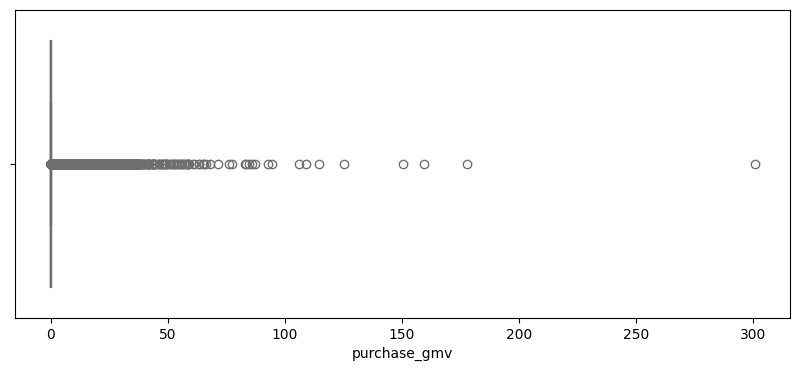

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='purchase_gmv', data=df, color='skyblue')
plt.show()

As previously mentioned, GMV data has large variations and quite positive outlies, which can mean that there are sales of products that perform well above the average of others, where the commission from these sales can be responsible for a considerable part of the revenue generated for Hotmart.

These very high values may be contributing to a considerable impact on the average value of sales made on the platform.

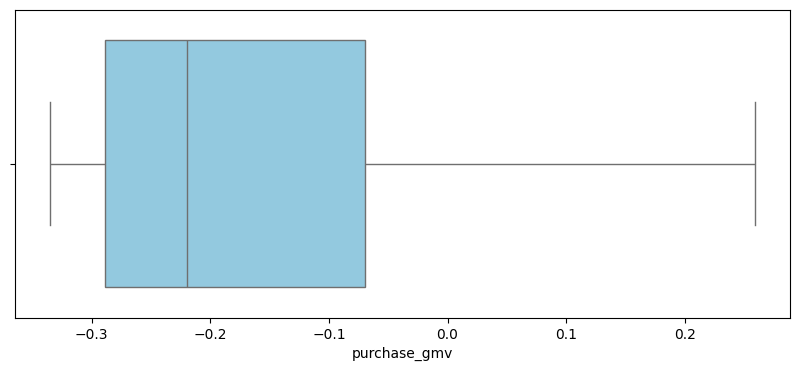

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='purchase_gmv', data=df, color='skyblue', showfliers = False)
plt.show()

When evaluating the data without outliers we see that the vast majority of sales have negative GMV, which for standardized data implies that the majority is below the platform's average sales value.

**What is the creators’ revenue?**

In [ ]:
# calculating the sum of revenue per creator
revenue_by_creator = df.groupby('creator_id')['purchase_gmv'].sum().reset_index(name='sales')
print(revenue_by_creator)

                         creator_id      sales
0        100-118-20-116-120-125-114  -0.049528
1        100-118-20-117-127-123-117  -0.553762
2        100-118-20-117-127-124-126 -10.160557
3            100-118-20-121-123-126  -0.203052
4        100-118-20-121-125-125-112  -0.321675
...                             ...        ...
64358  98-127-31-127-124-124-112-21  -0.643640
64359  98-127-31-127-124-125-115-25   1.642472
64360  98-127-31-127-125-120-126-26  15.700826
64361  98-127-31-127-125-127-112-29  -0.466287
64362  98-127-31-127-126-121-117-25  -0.109724

[64363 rows x 2 columns]


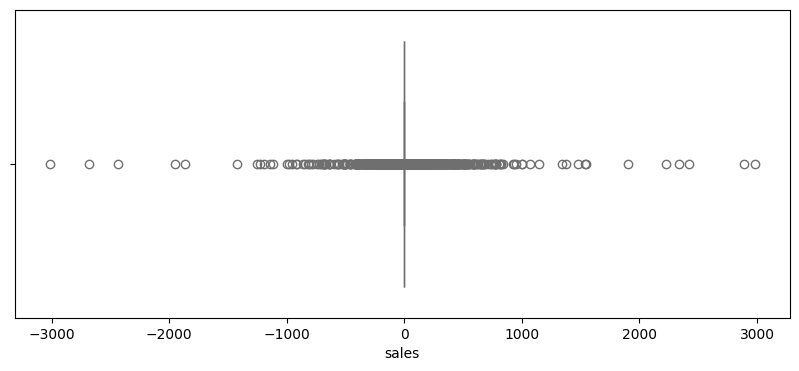

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='sales', data=revenue_by_creator, color='skyblue')
plt.show()

The **negative outliers** may be creators who sell many products, but these products have values below the platform's average, meaning lower-cost products sold in large quantities

Meanwhile, positive outliers consist of creators who have revenue well above the platform's average and high sales volume, which may indicate robust businesses and highly valuable partners for Hotmart

### **Analysis of the amount of sales and products by creators**

1. What is the distribution of sales by breeders

**What is the distribution of sales by breeders?**

In [ ]:
# Sales for each creator
sales_by_creator = df.groupby('creator_id')['purchase_id'].nunique().reset_index(name='sales')
print(sales_by_creator)

                         creator_id  sales
0        100-118-20-116-120-125-114      1
1        100-118-20-117-127-123-117      2
2        100-118-20-117-127-124-126     32
3            100-118-20-121-123-126      1
4        100-118-20-121-125-125-112      1
...                             ...    ...
64358  98-127-31-127-124-124-112-21      2
64359  98-127-31-127-124-125-115-25     39
64360  98-127-31-127-125-120-126-26     67
64361  98-127-31-127-125-127-112-29      3
64362  98-127-31-127-126-121-117-25      1

[64363 rows x 2 columns]


**Data distribution measures**

In [ ]:
sales_by_creator.describe()

,sales
count,64363.000000
mean,26.855476
std,219.941153
min,1.000000
25%,1.000000
50%,2.000000
75%,9.000000
max,30185.000000


- The average is approximately **26.86** per creator.
- The standard deviation is approximately **219.94**. This indicates a high dispersion of data around the mean. The higher the standard deviation, the greater the dispersion of values around the mean.
- **25%** of creators made only one sale within the platform.
- **50%** of creators have up to 2 units sold. This means that the median is 2, implying that half of the creators made 2 sales or less.
- **75%** of creators made up to 9 sales.
- The highest number of sales made by a creator is **30185**.

This description suggests that the distribution of sales by creators is quite asymmetric, with considerable variation.

Most sales are concentrated in smaller values, with the mean being pulled upwards by extremely high values, as evidenced by the high standard deviation and the maximum value of **30,185** units.

This may indicate that there are some cases of exceptionally high sales, while the majority of sales are of smaller quantities.

Visualizing this in a boxplot

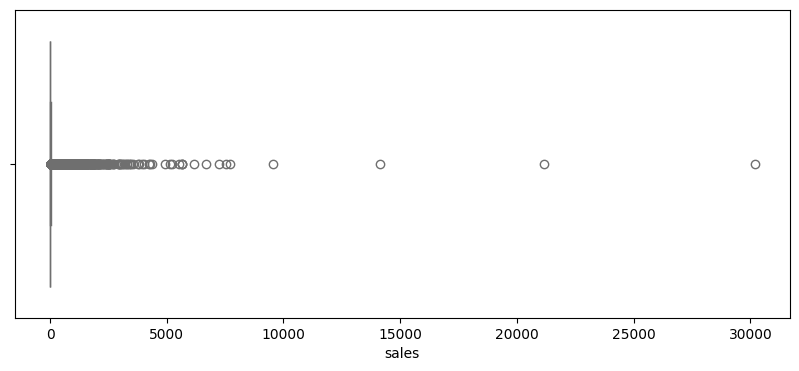

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='sales', data=sales_by_creator, color='skyblue')
plt.show()

The data show many positive outliers of creators per sales quantity, reaching up to **30,000** sales during this period. This indicates that Hotmart has highly successful creators within its platform.

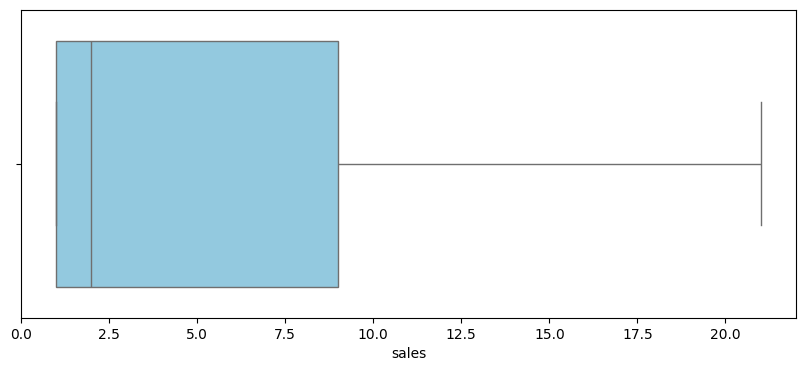

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='sales', data=sales_by_creator, color='skyblue', showfliers = False)
plt.show()

**What is the distribution of the number of products by creators?**

In [ ]:
products_by_creator = df.groupby('creator_id')['product_id'].nunique().reset_index(name='products')
print(products_by_creator)

                         creator_id  products
0        100-118-20-116-120-125-114         1
1        100-118-20-117-127-123-117         1
2        100-118-20-117-127-124-126         6
3            100-118-20-121-123-126         1
4        100-118-20-121-125-125-112         1
...                             ...       ...
64358  98-127-31-127-124-124-112-21         1
64359  98-127-31-127-124-125-115-25         1
64360  98-127-31-127-125-120-126-26         3
64361  98-127-31-127-125-127-112-29         2
64362  98-127-31-127-126-121-117-25         1

[64363 rows x 2 columns]


**Data distribution measures**

In [ ]:
products_by_creator.describe()

,products
count,64363.000000
mean,2.555552
std,5.185587
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,473.000000


- During this period, **64,363** different products were sold.

- The average number of products per seller is **2.5**.

- **75%** of sellers sold 1 or 2 different products.

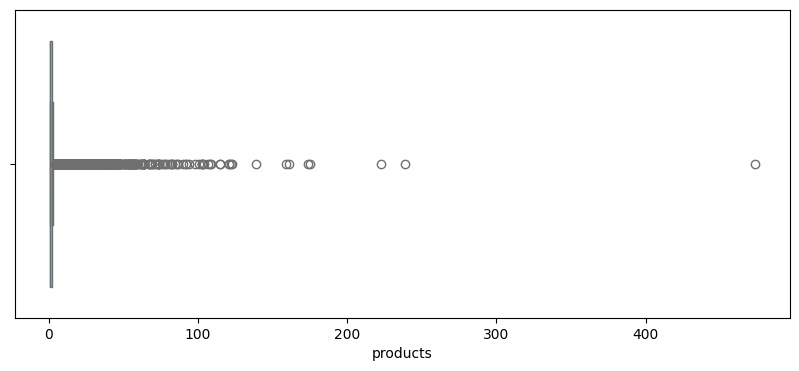

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='products', data=products_by_creator, color='skyblue')
plt.show()

In the number of products by creators, we also have a lot of positive outliers that exceed 100 different products sold.

Let's see how the producers that are not outliers are distributed.

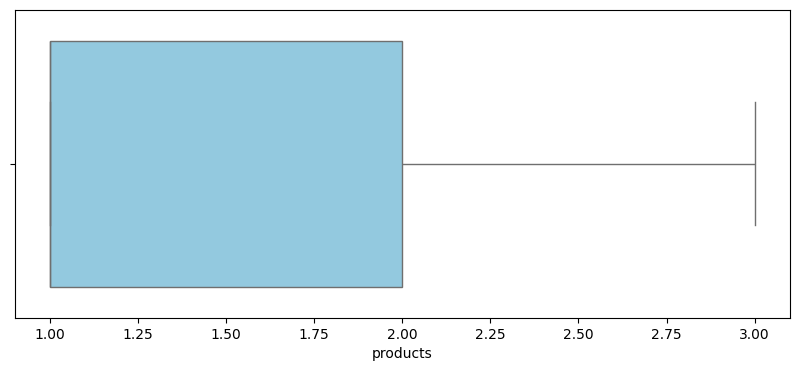

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='products', data=products_by_creator, color='skyblue', showfliers = False)
plt.show()

**75%** of content producers sold only **1 or 2** different products during this period.

This could mean that some producers prefer to focus their sales on specific and probably more specialized products.

# **Conclusions and Recommendations**


The analyzed information reveals the presence of two distinct profiles of producers within the Hotmart platform. Firstly, we identified small producers, characterized by having a limited number of products in their portfolios and specialization in specific niches. Although these producers may have lower sales volume, they play an important role in diversification and offering specialized content on the platform.

On the other hand, there is a second profile of producers distinguished by large sales volume and an extensive portfolio of products. These creators represent success cases within the platform and have a significant impact on the Hotmart ecosystem. However, as these producers expand their operations and seek to increase their sales, the need for more modern and robust product management tools arises.

For this second profile, the implementation of a more advanced product management tool may be crucial to handle the increasing complexity and demand. A robust tool can offer features such as advanced data analysis, inventory management, and process automation, empowering creators to scale their operations efficiently and sustainably.

Furthermore, the availability of a more advanced product management tool can be a competitive advantage for Hotmart in attracting major players in the digital product market. The ability to offer a platform that meets the needs of high-volume creators can not only strengthen relationships with existing producers but also attract new talents and high-quality content to the platform.